In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm 


In [2]:
class Planeta:
    
    def __init__(self, e, a, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt
        else:
            
            # rp pasado, r presente rf futuro
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = (self.rf - self.rp)/(2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
    
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPeriodo(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
                
        # PAARA OBETENR SOLO EL PRIMERO
       
        return timeup[0]
        
        

In [3]:
def GetPlanetas(t):
    
    Mercurio = Planeta(0.2056,0.307,t)
    Venus = Planeta(0.0067,0.7233,t)
    Tierra = Planeta(0.01671,1.,t)
    
    return [Mercurio,Venus,Tierra]

In [4]:
dt = 0.001
tmax = 5
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [5]:
def RunSimulation(t,Planetas):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        #print(it)
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared
            
            
    return Planetas

In [6]:
Planetas = RunSimulation(t,Planetas)
Planetas[1].GetPeriodo()

Running simulation:  38%|███▊      | 1903/5000 [00:00<00:00, 8992.50 Steps/s]

Running simulation: 100%|██████████| 5000/5000 [00:00<00:00, 9023.89 Steps/s]


0.552

In [7]:
scale = 20
t1 = t[::scale]
#plt.plot(Planetas[0].GetPosition()[:,0],Planetas[0].GetPosition()[:,1])

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(221,projection='3d')
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

colors=['r','k','b']

def init():
    
    ax.clear()
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_zlim(-1,1)
    
    ax1.clear()
    ax1.set_xlim(-1,1)
    ax1.set_ylim(-1,1) 
    
    ax2.clear()
    ax2.set_xlim(-2,2)
    ax2.set_ylim(-2,2) 
    
def Update(i):
    
    init()
    
    for j, p in enumerate(Planetas):
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        z = p.GetPosition(scale)[i,2]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        vz = p.GetVelocity(scale)[i,2]
    
        ax.scatter(0,0,0,s=200,color='y')
        ax.quiver(x,y,z,vx,vy,vz,color=colors[j],length=0.03)
        
        ax.scatter(x,y,z,color=colors[j])
        
        circle = plt.Circle((x,y),0.1,color=colors[j],fill=True)
        ax1.add_patch(circle)
    
    # Mercurio visto desde tierra
    Mx = Planetas[0].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    My = Planetas[0].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    # Venus visto desde tierra
    Vx = Planetas[1].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    Vy = Planetas[1].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    ax2.scatter(Mx,My,marker='.',label='Mercurio')
    ax2.scatter(Vx,Vy,marker='.',label='Venus')
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

#### Creacion de Planetas

In [9]:
t_tarea=np.arange(0,12,0.001)

#Planetas

Mercurio=Planeta(0.2056,0.387,t_tarea)
Venus= Planeta(0.006,0.723,t_tarea)
Tierra=Planeta(0.0167,1,t_tarea)
Marte=Planeta(0.0934,1.524,t_tarea)
Jupiter=Planeta(0.0484,5.20,t_tarea)

dic_planetas={'Planetas':['Mercurio','Venus','Tierra','Marte','Jupiter']}

lista_planetas=[Mercurio,Venus,Tierra,Marte,Jupiter]

periodo=[]

# Correr simulacion

lista_planetas=RunSimulation(t_tarea,lista_planetas)
for planeta in lista_planetas:
    per=planeta.GetPeriodo()
    periodo.append(per)
    
#Creacion de la tabla 

import pandas as pd 
dic_planetas['Periodo']=periodo

tabla=pd.DataFrame(dic_planetas)
tabla

Running simulation: 100%|██████████| 12000/12000 [00:02<00:00, 5949.54 Steps/s]


,Planetas,Periodo
0,Mercurio,0.239
1,Venus,0.546
2,Tierra,0.970
3,Marte,1.876
4,Jupiter,11.847


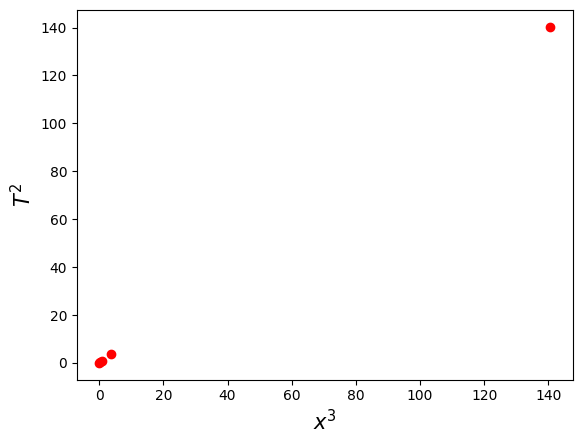

In [13]:
ejes_cubo=[0.387**3,0.723**3,1,1.524**3,5.20**3]
periodo2=[x**2 for x in periodo]

#Grafica

plt.scatter(ejes_cubo,periodo2,c='red')
plt.ylabel(r'$T^2$',fontsize=15)
plt.xlabel(r'$x^3$',fontsize=15)
plt.show()

## Puntos (d) y (e)

#### Grafica con la regresion lineal

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.9981682599237188

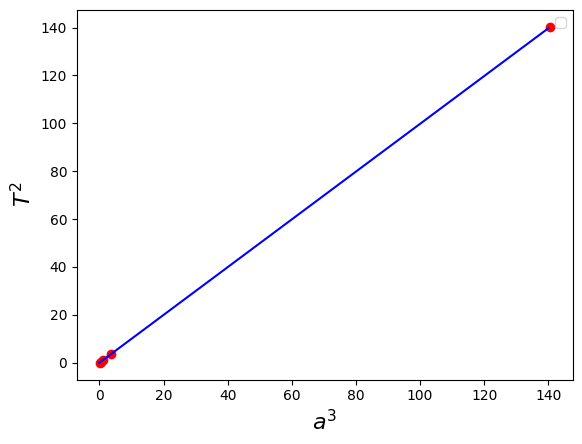

In [11]:
def regresion(x,y):
    promedio_x= np.mean(x)
    promedio_y= np.mean(y)
    
    diferencias_x=[]
    diferencias_y=[]
    
    for i in range(len(x)):
        x_ap= x[i]-promedio_x
        y_ap= y[i]-promedio_y
        
        diferencias_x.append(x_ap)
        diferencias_y.append(y_ap)
        
    # calcular la pendiente
    
    p1=[]
    p2=[]
    
    for i in range(len(x)):
        p1.append(x[i]*y[i])
        p2.append(x[i]**2)
        
    p1=sum(p1)
    p2=sum(p2)
    
    pendiente=p1/p2
    intercepto=promedio_y-pendiente *promedio_x
    
    return [pendiente,intercepto]    

pendiente,intercepto=regresion(ejes_cubo,periodo2)
plt.scatter(ejes_cubo,periodo2,c='red')
plt.plot([x for x in range(0,141)],[dato*pendiente + intercepto for dato in range(0,141)],c='blue')
plt.xlabel(r'$a^3$',fontsize=16)
plt.ylabel(r'$T^2$',fontsize=16)
plt.legend()
pendiente

### Dado que estamos usando unidades astronomicas, y segun la ley de kepler: 
$T^2 = \frac{4 \pi^2}{G M} a^3 $

entonces:

$m=\frac{4 \pi^2}{G M}$

$M=\frac{4 \pi^2}{G m}$

pero como m=1, y el lado derecho es la representacion de la masa del sol en unidades astronomicas,entonces podemos dedcur que el valor de la pendiente es la masa del solm, Lo cual en kg seria $1.98930\times 10^{30}$

